In [156]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import pyarrow.feather as feather

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder

In [142]:
work_dir = "/Users/ho/Documents/LLD/AI/data/"

df = feather.read_feather(work_dir + "3y_mechul.feather")
df

,FKDAT,WEEKDAY,KUNNR,FKART,AUGRU_AUFT,MATNR,VRKME_x,SPART,FKIMG,FKLMG,...,MSTAE,MAXLZ,LZEIH,TEXT1,REG_DATE,REG_ID,CHG_DATE,CHG_ID,GEWEI,WEB_GB
0,2020-01-01,2,1806139,F2,901,770008,KG,02,6800.0,6800.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
1,2020-01-01,2,1806139,S1,901,770008,KG,02,-3400.0,-3400.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
2,2020-01-02,3,1806139,F2,901,770008,KG,02,6520.0,6520.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
3,2020-01-02,3,1806139,S1,901,770008,KG,02,-3260.0,-3260.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
4,2020-01-03,4,1806139,S1,901,770008,KG,02,-3060.0,-3060.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873254,2022-12-27,1,1313795,F2,901,770201,KG,02,136.0,136.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,
873255,2022-12-28,2,1313795,F2,901,770201,KG,02,255.0,255.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,
873256,2022-12-29,3,1313795,F2,901,770201,KG,02,289.0,289.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,
873257,2022-12-30,4,1313795,F2,901,770201,KG,02,204.0,204.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,


In [130]:
df['MAXLZ'].unique()

array(['14', '7', '6', '1', '10', '3', '8', '180', '70', '5', '9', '40',
       '4', '2', '24', '15', '90', '30', '0', '270', '25', '12', '48',
       '72', '20', '185', '60', '365', '21', '210', '120', '160', '320',
       '430', '495', '45', '13', '18', '11', '16', '61', '235', '225',
       '720', '46', '80', '360'], dtype=object)

In [6]:
# 제품 브랜드
df['PRODH'].value_counts()

PRODH
100    401489
       356447
290     76862
240     21300
110      9689
120      3648
300      2520
230       568
210       423
180       276
190        28
140         8
200         1
Name: count, dtype: int64

In [8]:
# 제품군
df['SPART'].value_counts()

SPART
02    749925
03     61930
01     61386
Z1        18
Name: count, dtype: int64

In [9]:
# 지역
df['JIYEOK'].value_counts()

JIYEOK
경기    408310
대구     75673
인천     72200
경남     71318
세종     66886
강원     65695
광주     65283
대전     25289
서울     12666
전북      5665
충남      3535
충북       384
전남       355
Name: count, dtype: int64

In [10]:
# 요일
df['WEEKDAY'].value_counts()

WEEKDAY
2    129496
3    129161
0    128610
4    128009
1    126715
5    115977
6    115291
Name: count, dtype: int64

In [11]:
# 중량
df['WEIGHT'].value_counts()

WEIGHT
0.20       86415
0.25       73055
0.30       69514
500.00     61904
1.00       51007
           ...  
1560.00        1
0.40           1
410.00         1
454.00         1
2500.00        1
Name: count, Length: 263, dtype: int64

In [22]:
# 중량 단위
df['GEWEI'].value_counts()

GEWEI
KG    542059
G     331198
OZ         2
Name: count, dtype: int64

In [12]:
# 유통기간
df['MAXLZ'].value_counts()

MAXLZ
4      264923
6      113175
3       82367
1       59810
5       49405
40      46319
90      30483
24      28907
7       28288
14      23627
15      23537
9       20631
2       19703
180     13491
72      12026
10      11503
0       10046
365      8485
30       7925
20       6233
8        4938
12       2396
21       1285
60       1035
270       883
61        399
70        373
13        279
120       237
45        208
235       164
185        43
48         31
360        21
210        21
495        17
225        14
80         10
430         6
11          3
320         2
18          2
25          2
46          2
160         2
16          1
720         1
Name: count, dtype: int64

In [13]:
# 유통기간 구분
df['LZEIH'].value_counts()

LZEIH
DAY    618376
월      195177
HR      24220
년       17682
H       12057
         5732
주          15
Name: count, dtype: int64

In [19]:
# 소매가
df['SOMET'].value_counts()

SOMET
0        679609
1        134506
3500       7504
6900       4873
1200       3238
          ...  
4345          1
10000         1
49000         1
3950          1
4290          1
Name: count, Length: 174, dtype: int64

In [20]:
# 주문 수량
df['FKIMG'].value_counts()

FKIMG
 1.0        25124
 2.0        20836
 4.0        16786
 3.0        16128
 5.0        15245
            ...  
-2180.0         1
-2900.0         1
-3343.0         1
 10023.0        1
 2867.5         1
Name: count, Length: 14055, dtype: int64

In [44]:
df[df['PRODH']=='   ']['MAKTX'].value_counts()

MAKTX
마늘토핑                      12912
뉴아몬드크림                    12434
옥수수 토핑물                   12162
연유토핑물                     12123
마요토핑물                     12121
                          ...  
바닐라빈 페이스트                     1
샐러드 믹스그린_400g                 1
아로마 비닐라 V150,액상,              1
샌드팜)청크라이트튜나(11.31kg)          1
PREMIX 929KST,20kg,가공,        1
Name: count, Length: 70, dtype: int64

In [143]:
# 레이블 인코더 생성
label_encoder = LabelEncoder()

columns_to_encode = ['SPART', 'JIYEOK', 'MVGR1', 'MVGR2', 'MVGR3','MVGR4','MVGR5']
for column in columns_to_encode:
    # 문자열 컬럼을 정수로 인코딩
    encoded_column = label_encoder.fit_transform(df[column])
    # 인코딩된 컬럼을 데이터프레임에 할당
    df[column] = encoded_column

In [144]:
# 제품 브랜드 ‘   ‘ (비어있는 변수) 처리
df.loc[df['PRODH'] == '   ', 'PRODH'] = '0'

# 변수 int로 변경
df['PRODH'] = df['PRODH'].astype(int)

In [145]:
df['WEEKDAY'] = df['WEEKDAY'].astype(int)

In [146]:
# 중량을 Gram으로 통일
df.loc[df['GEWEI'] == 'KG', 'WEIGHT'] = df.loc[df['GEWEI'] == 'KG', 'WEIGHT'] * 1000
df.loc[df['GEWEI'] == 'OZ', 'WEIGHT'] = df.loc[df['GEWEI'] == 'OZ', 'WEIGHT'] * 28.3495

In [147]:
df['MAXLZ'] = df['MAXLZ'].astype(int)

# 유통기간을 DAY로 통일 (H, HR은 뭔지 몰라서 삭제)
df = df[df['LZEIH'] != ' ']
df = df[df['LZEIH'] != 'H']
df = df[df['LZEIH'] != 'HR']


df.loc[df['LZEIH'] == '주', 'MAXLZ'] = df.loc[df['LZEIH'] == '주', 'MAXLZ'] * 7
df.loc[df['LZEIH'] == '월', 'MAXLZ'] = df.loc[df['LZEIH'] == '월', 'MAXLZ'] * 30
df.loc[df['LZEIH'] == '년', 'MAXLZ'] = df.loc[df['LZEIH'] == '년', 'MAXLZ'] * 365

In [162]:
X = df[['PRODH', 'SPART', 'JIYEOK', 'WEEKDAY', 'WEIGHT', 'MAXLZ']]

In [163]:
X.isna().sum()   

PRODH      0
SPART      0
JIYEOK     0
WEEKDAY    0
WEIGHT     0
MAXLZ      0
dtype: int64

In [164]:
y = df['FKIMG']

In [165]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측
y_pred = rf_regressor.predict(X_test)

# 회귀 모델의 성능 평가 (평균 제곱 오차)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3965700.0097124465


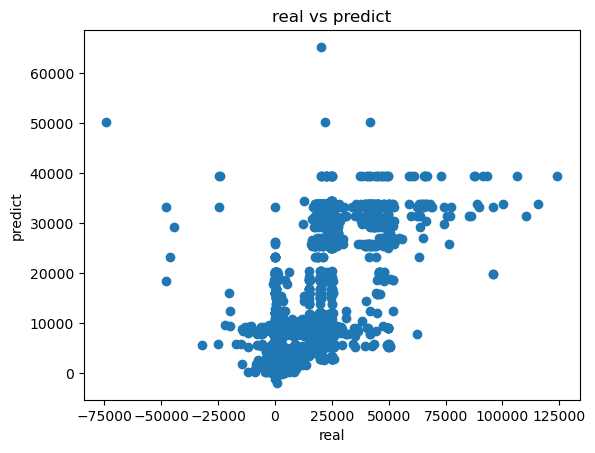

In [166]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(y_test, y_pred)
plt.xlabel('real')
plt.ylabel('predict')
plt.title('real vs predict')
plt.show()

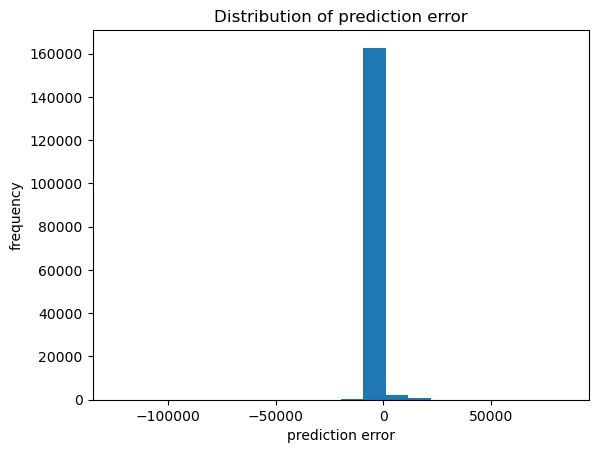

In [167]:
error = y_test - y_pred

# 예측 오차의 분포를 히스토그램으로 그리기
plt.hist(error, bins=20)
plt.xlabel('prediction error')
plt.ylabel('frequency')
plt.title('Distribution of prediction error')
plt.show()